<a href="https://colab.research.google.com/github/tanmayyb/screw-detector/blob/main/patch_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patch Trainer on Nut Dataset

## Data Loading and Basic Functions

In [ ]:
#@title Imports
import os
import requests
import random
import json
import numpy as np
from skimage import io
from scipy import ndimage
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import torch
from torch import nn
import torch.optim as optim
from torchsummary import summary
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import rcParams, gridspec
from matplotlib import patches, transforms as plt_transforms

import pickle
import cv2

rcParams['figure.figsize'] = [16, 6]
rcParams['font.size'] =14
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [ ]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# @title Choose device
def set_device():
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

In [ ]:
device = set_device()

GPU is not enabled in this notebook. 
If you want to enable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `GPU` from the dropdown menu


In [ ]:
path = 'content/gdrive/My Drive/screw_dataset/'

### load `imgdict` & `annodict`

In [ ]:
#with open( os.path.join(path,'saved_variables', 'annodict.pkl'), 'rb') as fid:
#  annodict  = pickle.load(fid) 

In [ ]:
#with open( os.path.join(path,'saved_variables', 'imgdict.pkl'), 'rb') as fid:
#  imgdict  = pickle.load(fid) 

## Load Patches & Labels

In [ ]:
cd /

/


In [ ]:
path = 'content/gdrive/My Drive/screw_dataset/nut_patch_model'

In [ ]:
with open( os.path.join(path, 'preprocessed', 'train_labels.pkl'), 'rb') as fid:
  train_labels = pickle.load(fid)

with open( os.path.join(path, 'preprocessed', 'test_labels.pkl'), 'rb') as fid:
  test_labels = pickle.load(fid)

In [ ]:
path = 'content/gdrive/My Drive/screw_dataset/nut_patch_model/preprocessed'

In [ ]:
train_img = []
for filename in os.listdir(os.path.join(path, 'train')):
  img = cv2.imread(os.path.join(path,'train', filename))
  if type(img) != None:
    train_img.append(img)

In [ ]:
test_img = []
for filename in os.listdir(os.path.join(path, 'test')):
  img = cv2.imread(os.path.join(path,'test', filename))
  if type(img) != None:
    test_img.append(img)

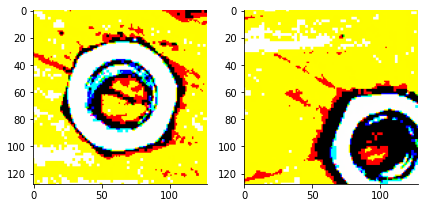

In [ ]:
plt.subplot(1,2,1)
plt.imshow(train_img[100]*255)
plt.subplot(1,2,2)
plt.imshow(test_img[0]*255)

## Preprocessing Data

From this training data we preprocess and augment it to make it better for training 

In [ ]:
import PIL
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(degrees=(0, 90)),
    torchvision.transforms.FiveCrop(size = (128,128))
])

In [ ]:
# #tensor.shape
# tensor = torch.Tensor(train_img[100])
# #print(tensor.shape, tensor.permute(2,0,1).shape)

# transformed = transforms(tensor.permute(2,0,1))
# for i in range(5):
#   plt.subplot(2,3,i+1)
#   plt.imshow(transformed[i].permute(1,2,0))

In [ ]:
# aug_frac = 0.2
# aug_num = int(len(train_img) * aug_frac)

# training_data = list()

# for i in range(aug_num):
#   augmented = transforms( torch.tensor(train_img[i]).permute(2,0,1)  )
#   for image in augmented:
#     training_data.append(image.permute(1,2,0).numpy())

# for image in train_img[aug_num:]:
#   training_data.append(image)

In [ ]:
#plt.imshow(training_data[5]*255)

## Training Model

In [ ]:
# Model
model = torch.hub.load('ultralytics/yolov3', 'yolov3', autoshape = False, pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov3_master
YOLOv3 🚀 2022-7-27 torch 1.12.0+cu113 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients


In [ ]:
# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

In [ ]:
# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)

/usr/local/lib/python3.7/dist-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
image 1/1: 720x1280 2 persons, 2 ties
Speed: 293.4ms pre-process, 2571.6ms inference, 7.4ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp


tensor([[1.42960e+02, 2.00867e+02, 1.06258e+03, 7.15174e+02, 9.36926e-01, 0.00000e+00],
        [7.43848e+02, 4.22316e+01, 1.12634e+03, 7.12396e+02, 9.16234e-01, 0.00000e+00],
        [4.33421e+02, 4.33088e+02, 5.21299e+02, 7.16099e+02, 8.61753e-01, 2.70000e+01],
        [9.90362e+02, 3.16880e+02, 1.02388e+03, 4.17993e+02, 3.32481e-01, 2.70000e+01]])